In [1]:
import numpy as np
from MazeEnv import MazeEnv
from value_function_utils import visualize_maze_values

env = MazeEnv()
print(f"Observation space : {env.observation_space}")
print(f"action space: {env.action_space}")


Observation space : Discrete(1)
action space: Discrete(4)


In [2]:
from pathlib import Path

In [3]:
state_dim  = env.distinct_states
state_values = np.zeros(state_dim)
q_values = np.zeros((state_dim,env.action_space.n))
policy = np.zeros(state_dim)


In [4]:
discount = 0.9
iters = 1000

In [8]:
def calculate_values(state,action):
    slip_action = env.slip_action[action]
    env.set_state(state)
    slip_next_state,slip_reward,done = env.step(slip_action,slip=False)
    
    transitions=[]
    transitions.append((slip_reward,slip_next_state,env.slip))
    env.set_state(state)
    next_state,reward,done = env.step(slip_action,slip=False)
    if env.index_to_coordinate_map[int(next_state/8)]==env.goal_pos[0]:
        print(next_state)
    transitions.append((reward,next_state,1-env.slip))

    #print(f"{state} {action} {slip_next_state} {next_state}")
    v_sum=0
    for reward,next_state,pi  in transitions:
        v_sum+=pi*(reward+discount*state_values[next_state])
    
    return v_sum
from pathlib import Path

In [9]:
for i in range(iters):
    v_s = np.zeros(state_dim)
    for state in range(state_dim):
        #print(env.index_to_coordinate_map[int(state/8)],env.goal_pos[0])
        if env.index_to_coordinate_map[int(state/8)]==env.goal_pos[0]:
            continue

        v_max = float("-inf")

        for action in range(env.action_space.n):
            v_sum = calculate_values(state,action)
            v_max = max(v_max,v_sum)
        
        v_s[state] = v_max

    state_values = np.copy(v_s)



[ 6.27621192  7.62559748  9.565938    8.6093442  11.62261467 11.8098
 14.348907   17.7147      6.9735688   8.6093442   9.565938   10.62882
 11.62261467 13.122      15.94323    17.7147      7.74840978 10.4603532
  7.74840978  8.47288609 11.62261467 14.348907   12.9140163  15.94323
  6.9735688   9.565938   11.62261467 10.62882    14.58       14.58
 17.7147     17.7147      6.9735688  10.4603532  10.62882    10.62882
 13.122      13.122      15.94323    17.7147      7.74840978 10.4603532
  9.565938    8.6093442  11.62261467 14.348907   14.348907   17.7147
  6.9735688   9.565938   13.122      11.8098     14.58       14.58
 17.7147     21.87        6.9735688   9.565938   13.122      11.8098
 16.2        16.2        17.7147     24.3         6.9735688  11.8098
 11.62261467 11.8098     17.7147     14.58       17.7147     21.87
  6.9735688  11.8098     11.8098     11.8098     16.2        18.
 18.         27.          8.6093442  13.122      13.122      10.62882
 17.7147     14.58       16.2     

In [10]:
for state in range(state_dim):
    for action in range(env.action_space.n):
        q_values[state,action] = calculate_values(state,action)


In [11]:
for state in range(state_dim):
    policy[state] = np.argmax(q_values[state,:])

Action mapping:[0 - UP; 1 - DOWN; 2 - LEFT; 3 - RIGHT
Optimal actions:
[3. 3. 0. 3. 0. 3. 3. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 1. 2. 1. 2. 0.
 0. 0. 0. 1. 0. 3. 2. 3. 0. 0. 1. 0. 3. 0. 2. 0. 0. 0. 0. 2. 0. 2. 3. 1.
 3. 3. 0. 1. 0. 0. 2. 0. 0. 0. 3. 1. 3. 2. 2. 2. 2. 3. 3. 2. 3. 0. 0. 0.
 0. 2. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2.]


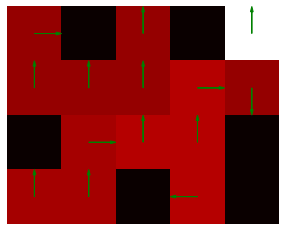

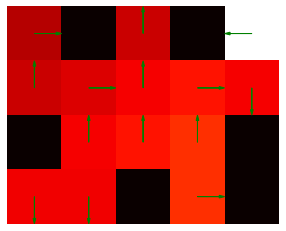

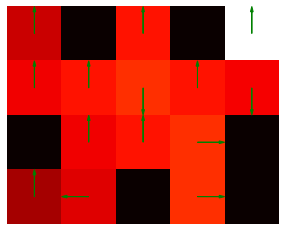

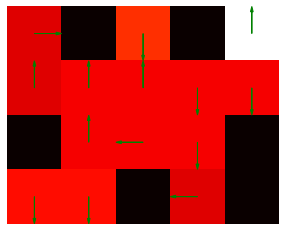

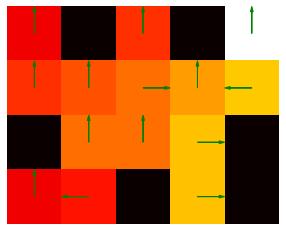

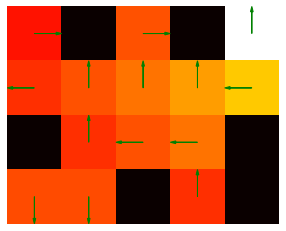

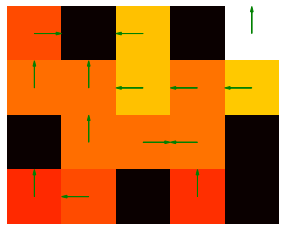

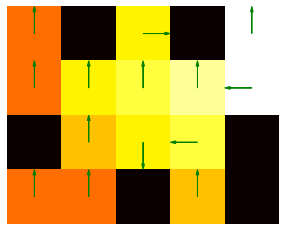

In [12]:
Path("results").mkdir(exist_ok=True)
np.save("results/q_values", q_values)
np.save("results/optimal_policy", policy)
# print(q_values)
print("Action mapping:[0 - UP; 1 - DOWN; 2 - LEFT; 3 - RIGHT")
print("Optimal actions:")
print(policy)
visualize_maze_values(q_values, env)